## Project Objective:
- **To Predict the 'audience_rating' dependant variable from the given RottenTomatoes movies dataset - Regression Problem**
- **To build a deep learning neural network using PYTORCH**

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Loading the dataset

In [2]:
df=pd.read_excel('Rotten_Tomatoes_Movies3.xls')
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


## Creating a function to remove duplicates

In [3]:
def remove_duplicates(dataframe,df_variable):
    a=len(dataframe)
    print(f'Original length of dataframe {df_variable}',a)
    dataframe.drop_duplicates(inplace=True)
    b=len(dataframe)
    print(f'Dataframe {df_variable} length after dropping duplicate rows',b)
    print('No of duplicate rows removed',a-b)

In [4]:
remove_duplicates(df,'df')

Original length of dataframe df 16638
Dataframe df length after dropping duplicate rows 16637
No of duplicate rows removed 1


In [5]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

## Finding unique lables, null values  and null_value percent in the dataset columns

In [6]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
movie_title,object,0,16106,0.000000
movie_info,object,24,16613,0.001443
critics_consensus,object,8328,8307,0.500571
rating,object,0,8,0.000000
genre,object,17,1080,0.001022
directors,object,114,8314,0.006852
writers,object,1349,12121,0.081084
cast,object,284,16326,0.017070
in_theaters_date,datetime64[ns],815,5586,0.048987
on_streaming_date,datetime64[ns],2,2260,0.000120


- 'critics_consensus' column has 50% missing values. I'll drop it.
- By intuition I'm going to drop the 'movie_title', 'movie_info','writers' and 'cast'columns

## Visualizing to gain insights

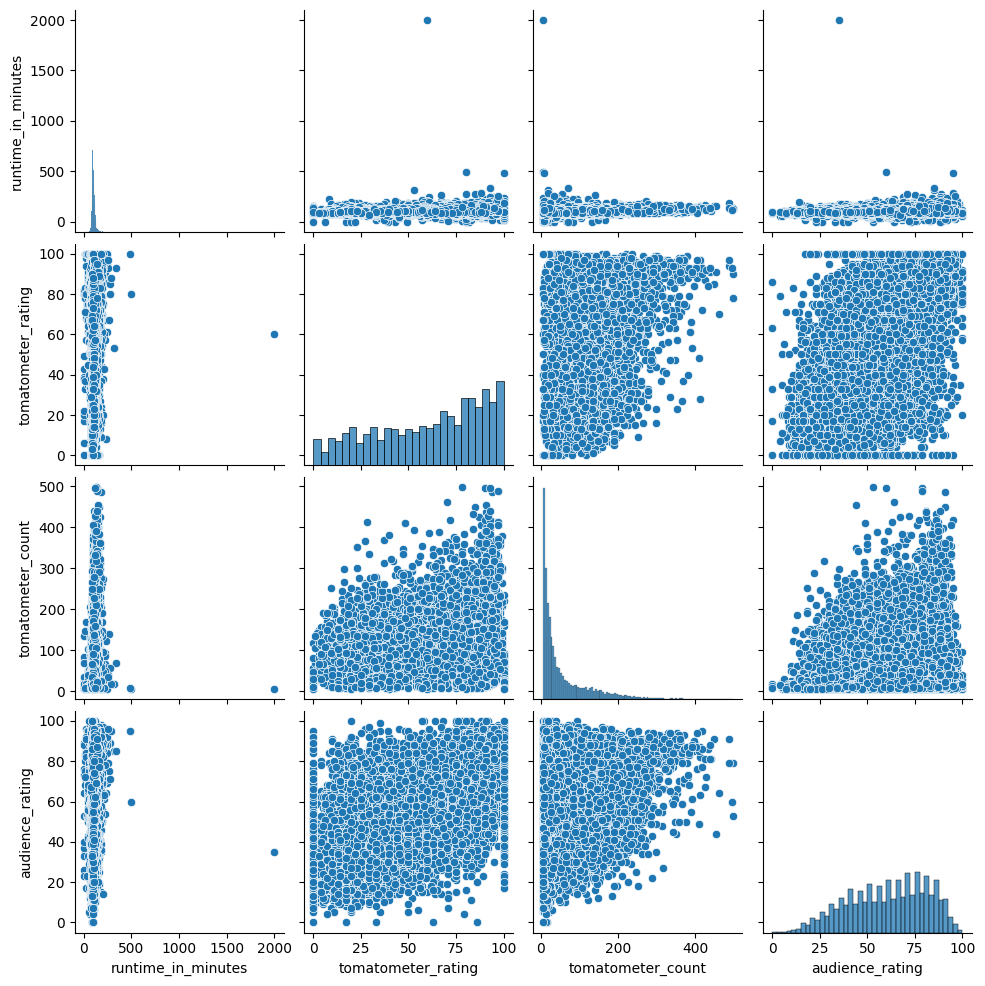

In [7]:
sns.pairplot(df[['runtime_in_minutes', 
       'tomatometer_rating', 'tomatometer_count', 'audience_rating']])
plt.show()

- No linear relationship between variables is observed.

### Filtering selected columns for model building

In [8]:
df=df[['rating', 'genre',
       'directors',  'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating']]

In [9]:
df.dropna(inplace=True)

## Plotting the target variable to get insights

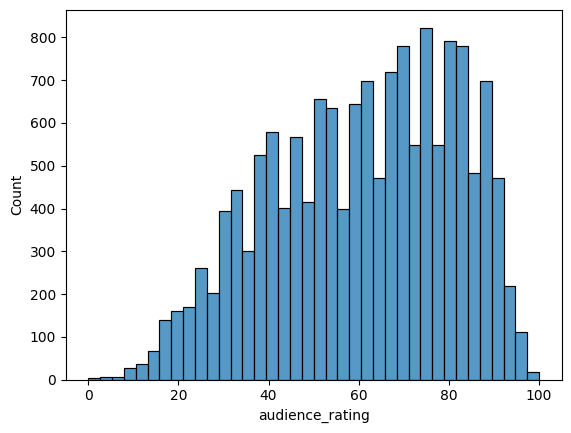

In [10]:
sns.histplot(df['audience_rating'])
plt.show()

- The distribution is slightly left skewed

In [11]:
df['audience_rating'].describe()

count    15200.000000
mean        60.743553
std         20.371044
min          0.000000
25%         45.000000
50%         63.000000
75%         78.000000
max        100.000000
Name: audience_rating, dtype: float64

## Segregating categorical and numerical columns

In [12]:
#categorical columns list
cc=[]
#numerical columns list
nc=[]
for i in df.columns:
    if df[i].dtype=='O':
        cc.append(i)
    else:
        nc.append(i)
print('categorical_columns:',cc)
print()
print('numerical_columns:',nc)

categorical_columns: ['rating', 'genre', 'directors', 'studio_name', 'tomatometer_status']

numerical_columns: ['in_theaters_date', 'on_streaming_date', 'runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating']


##  Engineering the categorical and Date columns and creating new columns

In [13]:
#Extracting the date, month and year separately and creating columns
df['in_theaters_year'] = pd.DatetimeIndex(df['in_theaters_date']).year
df['in_theaters_month'] = pd.DatetimeIndex(df['in_theaters_date']).month
df['in_theaters_date_'] = pd.DatetimeIndex(df['in_theaters_date']).date

df['on_streaming_year'] = pd.DatetimeIndex(df['on_streaming_date']).year
df['on_streaming_month'] = pd.DatetimeIndex(df['on_streaming_date']).month
df['on_streaming_date_'] = pd.DatetimeIndex(df['on_streaming_date']).date

df['in_theaters_date_']=df['in_theaters_date_'].astype('str')
df['on_streaming_date_']=df['on_streaming_date_'].astype('str')

df['in_theaters_date']=df['in_theaters_date'].astype('str')
df['on_streaming_date']=df['on_streaming_date'].astype('str')

df['in_theaters_date_']=df['in_theaters_date_'].apply(lambda x:int(str(x[-2:])))
df['on_streaming_date_']=df['on_streaming_date_'].apply(lambda x:int(str(x[-2:])))

df.head()

,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,in_theaters_year,in_theaters_month,in_theaters_date_,on_streaming_year,on_streaming_month,on_streaming_date_
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,2010,2,12,2010,6,29
1,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,2010,4,30,2010,10,19
2,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,1979,10,5,1997,8,27
3,NR,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,1957,4,13,2001,3,6
4,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,1954,1,1,2003,5,20


### Engineering the 'rating' column

In [14]:
df['rating'].value_counts()

rating
R         5857
NR        3940
PG-13     2771
PG        1970
G          624
NC17        34
PG-13)       3
R)           1
Name: count, dtype: int64

In [15]:
# Correcting and mapping the ratings based on the severity of the rating from 0 to 5

df['rating']=df['rating'].map({'R':4,'NR':0,'PG-13':3,'PG':2,'G':1,'NC17':5,
                              'PG-13)':3,'R)':4})
df['rating'].value_counts()

rating
4    5858
0    3940
3    2774
2    1970
1     624
5      34
Name: count, dtype: int64

### Engineering the 'tomatometer_status' column

In [16]:
df['tomatometer_status'].value_counts()

tomatometer_status
Rotten             6692
Fresh              5624
Certified Fresh    2884
Name: count, dtype: int64

In [17]:
# Correcting and mapping the 'tomatometer_status' based on the severity of the rating from 1 to 3

df['tomatometer_status']=df['tomatometer_status'].map({'Rotten':1,'Fresh':2,'Certified Fresh':3})
df['tomatometer_status'].value_counts()

tomatometer_status
1    6692
2    5624
3    2884
Name: count, dtype: int64

### Engineering the 'directors' column 

In [18]:
df['directors'].nunique()

7581

In [19]:
dir_dict=dict()

dir_name=list(df['directors'].value_counts().index) #director name
val_count=list(df['directors'].value_counts())      #value count of directors

for idx,value in enumerate(val_count):
    try:
        dir_dict[str(value)].append(dir_name[idx])
    except KeyError:
        dir_dict[str(value)]=[dir_name[idx]]

In [20]:
director_encoding=dict()

for i in list(dir_dict.keys()):
    k=0
    while k<len(dir_dict[i]):
        
        director_encoding[dir_dict[i][k]]=int(i)
        k+=1
# Creating a new column which contains the total films directed by each director   
df['total_films']=df['directors'].map(director_encoding)

#### Grouping rare directors

In [21]:
dir_name=list(df['directors'].value_counts().index) #director name
val_count=list(df['directors'].value_counts())      #value count of directors

rare_dir=dict()
for idx,director in enumerate(dir_name):
    if val_count[idx]==1:
        rare_dir[director]='1_movie_dir'
    elif val_count[idx]==2:
        rare_dir[director]='2_movie_dir'
    elif val_count[idx]==3:
        rare_dir[director]='3_movie_dir'
    elif val_count[idx]==4:
        rare_dir[director]='4_movie_dir'
    else:
        rare_dir[director]=director.lower()
        
# Creating a new column which groups the director with less than 5 films as:  
# '1_movie_dir'- means the director has directed only 1 movie
# '2_movie_dir'- means the director has directed only 2 movies
# '3_movie_dir'- means the director has directed only 3 movies
# '4_movie_dir' - means the director has directed only 4 movies

df['directors']=df['directors'].map(rare_dir)

In [22]:
stat_dir_max=dict()
stat_dir_mean=dict()
stat_dir_min=dict()

for i in df['directors'].unique():
    stat_dir_max[i]=df.loc[df['directors']==i]['audience_rating'].max()
    stat_dir_mean[i]=df.loc[df['directors']==i]['audience_rating'].mean()
    stat_dir_min[i]=df.loc[df['directors']==i]['audience_rating'].min()
    
# Creating new columns which contain the max,mean and min 'audience_rating'  of each director
df['dir_max_rating']=df['directors'].map(stat_dir_max)
df['dir_min_rating']=df['directors'].map(stat_dir_min)
df['dir_mean_rating']=df['directors'].map(stat_dir_mean)

### Engineering the 'studio_name' column

In [23]:
studio_name=list(df['studio_name'].value_counts().index) #studio name
vals_count=list(df['studio_name'].value_counts())      #value count of studio

rare_stu=dict()
for idx,studio in enumerate(studio_name):
    if vals_count[idx]==1:
        rare_stu[studio]='1_stu'
    elif vals_count[idx]==2:
        rare_stu[studio]='2_stu'
    elif vals_count[idx]==3:
        rare_stu[studio]='3_stu'
    else:
        rare_stu[studio]=studio.lower()
        
# Creating a new column which groups the ''studio' which has produced less than 4 films as:  
# '1_stu'- means the 'studio' has produced only 1 movie
# '2_stu'- means the 'studio' has produced only 2 movies
# '3_stu'- means the 'studio' has produced only 3 movies
       
df['studio_name']=df['studio_name'].map(rare_stu)

### Engineering the 'genre' column

In [24]:
# Creating a new column which contains the length of genre' count for a film
df['genre_len']=df['genre'].apply(lambda x:len(x.split(',')))

In [25]:
#categorical columns list
cc=[]
#numerical columns list
nc=[]
for i in df.columns:
    if df[i].dtype=='O':
        cc.append(i)
    else:
        nc.append(i)
print('categorical_columns:',cc)
print()
print('numerical_columns:',nc)

categorical_columns: ['genre', 'directors', 'in_theaters_date', 'on_streaming_date', 'studio_name']

numerical_columns: ['rating', 'runtime_in_minutes', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'in_theaters_year', 'in_theaters_month', 'in_theaters_date_', 'on_streaming_year', 'on_streaming_month', 'on_streaming_date_', 'total_films', 'dir_max_rating', 'dir_min_rating', 'dir_mean_rating', 'genre_len']


## Using only the best independent features 

In [26]:
df=df[['tomatometer_rating','genre','directors','studio_name', 'runtime_in_minutes',
       'in_theaters_year','tomatometer_status','tomatometer_count','audience_rating']]

In [27]:
from sklearn.model_selection import train_test_split
# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

In [28]:
X = df.drop('audience_rating',axis=1)
y = df['audience_rating']

# For building the current model
X_train, X_test, y_train, y_test = train_test_split(
    X,  # predictors
    y,  # target
    test_size=0.30,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility


In [29]:
mean_enc = MeanEncoder(variables=['directors', 'studio_name', 'genre']) #cc- categorical columns
mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['directors', 'studio_name', 'genre'])

In [30]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

C:\Users\Kavin\anaconda3\envs\ml_zoho\lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) directors, studio_name, genre.
  warnings.warn(


,tomatometer_rating,genre,directors,studio_name,runtime_in_minutes,in_theaters_year,tomatometer_status,tomatometer_count
11809,65,58.258065,67.000000,61.071429,101.0,2015,2,195
12922,97,71.200000,58.398948,61.071429,100.0,2018,3,370
6617,22,60.846154,58.529330,60.410526,74.0,1959,1,9
5783,64,70.035040,59.000000,55.600000,96.0,2002,2,116
9108,26,47.984733,58.529330,64.869565,120.0,2016,1,193


In [31]:
# Creating a new column in the X_test called 'y_test' which contains all values from y_test
X_test['y_test']=y_test

# Dropping NaN rowss
X_test.dropna(inplace=True)

# Creating a new y_test with no NaN values
y_test=X_test['y_test']

# Removing the target variable from X_test
X_test.drop('y_test',axis=1,inplace=True)

## Building a Neural network  using PYTORCH

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [33]:
class Model(nn.Module):
    def __init__(self, in_features=8, h1=40, h2=20, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [34]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

In [35]:
# Converting Train and Test sets as tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

y_train = torch.FloatTensor(y_train.values.reshape(-1,1))
y_test = torch.FloatTensor(y_test.values.reshape(-1,1))

In [36]:
X_train.shape,y_train.shape

(torch.Size([10640, 8]), torch.Size([10640, 1]))

In [37]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [38]:
# For calculating the loss 
criterion = nn.MSELoss()

# For updating the weights during back propagation
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [39]:
epochs = 1000
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%100 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 43086.08593750
epoch: 101  loss: 347.49249268
epoch: 201  loss: 330.75485229
epoch: 301  loss: 309.87332153
epoch: 401  loss: 284.67977905
epoch: 501  loss: 255.04248047
epoch: 601  loss: 224.76296997
epoch: 701  loss: 204.59936523
epoch: 801  loss: 197.31201172
epoch: 901  loss: 194.26736450


In [40]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 14.32358551


In [41]:
from sklearn.metrics import r2_score
print(f'R2-SCORE: {r2_score(y_test,y_val)}')

R2-SCORE: 0.504893677490218


### Comparing the differences between real and predicted values

In [42]:
a=[]
p=[]
d=[]
for i in range(len(X_test)):
    a.append(y_test[i].item())
    p.append(y_val[i].item())
    
    diff = np.abs(y_val[i].item()-y_test[i].item())
    d.append(diff)
    

In [43]:
metric=pd.DataFrame({"PREDICTED":p,"ACTUAL":a,"DIFF":d})


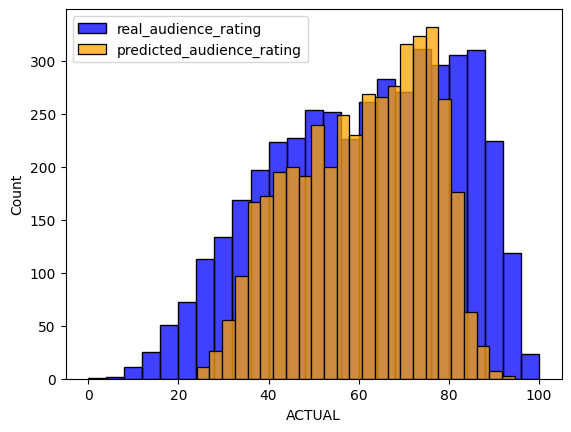

In [44]:
sns.histplot(metric['ACTUAL'],color="blue", label='real_audience_rating',)
sns.histplot(metric['PREDICTED'],color="orange", label='predicted_audience_rating',)
plt.legend()
plt.show()

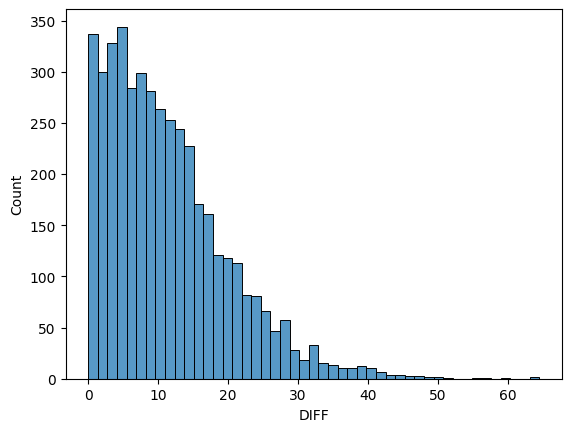

In [45]:
sns.histplot(metric['DIFF'], label='difference',)
plt.show()

In [46]:
metric['DIFF'].describe()

count    4358.000000
mean       11.351472
std         8.736515
min         0.005447
25%         4.609494
50%         9.665010
75%        15.891472
max        64.457825
Name: DIFF, dtype: float64

## Results 

- **R2-score:0.5040**
- **RMSE:14.334**
